<a href="https://colab.research.google.com/github/ashutoshb206/Linear_regression/blob/main/Linear_regression_boston_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Build Linear Regression Model in Python**


## **Load the Boston Housing dataset (via GitHub)**

The Boston Housing dataset was obtained from the mlbench R package, which was loaded using the following commands:

```
library(mlbench)
data(BostonHousing)
```


### **Import library**

In [1]:
import pandas as pd

### **Download CSV from GitHub**

In [2]:
! wget https://github.com/dataprofessor/data/raw/master/BostonHousing.csv

--2025-06-07 11:57:31--  https://github.com/dataprofessor/data/raw/master/BostonHousing.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/BostonHousing.csv [following]
--2025-06-07 11:57:31--  https://raw.githubusercontent.com/dataprofessor/data/master/BostonHousing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36242 (35K) [text/plain]
Saving to: ‘BostonHousing.csv’

BostonHousing.csv   100%[===================>]  35.39K  --.-KB/s    in 0.02s   

2025-06-07 11:57:31 (2.17 MB/s) - ‘BostonHousing.csv’ saved [36242/36242]



### **Read in CSV file**

In [3]:
BostonHousing = pd.read_csv("BostonHousing.csv")
BostonHousing

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### **Split dataset to X and Y variables**

In [4]:
Y = BostonHousing.medv
Y

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [5]:
X = BostonHousing.drop(['medv'], axis=1)
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


## **Data split**

### **Import library**

In [6]:
from sklearn.model_selection import train_test_split

### **Perform 80/20 Data split**

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### **Data dimension**

In [8]:
X_train.shape, Y_train.shape

((404, 13), (404,))

In [9]:
X_test.shape, Y_test.shape

((102, 13), (102,))

## **Linear Regression Model**

### **Import library**

In [10]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

### **Build linear regression**

#### Defines the regression model

In [11]:
model = linear_model.LinearRegression()

#### Build training model

In [12]:
model.fit(X_train, Y_train)

LinearRegression()

#### Apply trained model to make prediction (on test set)

In [13]:
Y_pred = model.predict(X_test)

## **Prediction results**

### **Print model performance**

In [15]:
print('Coefficients:', model.coef_) # each value tells how much that feature affects the prediction.
print('Intercept:', model.intercept_)  # value of prediction when all feature values are 0
print('Mean squared error (MSE): %.2f' # Measures average squared difference between actual and predicted values. - lower mse = better model
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'  # shows how perfect the model is - 1 = perfect, 0 = no better than mean, -ve = worse than mean
      % r2_score(Y_test, Y_pred))

Coefficients: [-8.65832320e-02  3.43278082e-02 -3.79421031e-03  2.26318523e+00
 -1.48347087e+01  3.71278506e+00 -1.66251495e-03 -1.29490246e+00
  2.52775096e-01 -1.21290908e-02 -9.26504072e-01  8.53721704e-03
 -4.91578231e-01]
Intercept: 35.040244129398594
Mean squared error (MSE): 31.68
Coefficient of determination (R^2): 0.70


### **String formatting**

By default r2_score returns a floating number ([more details](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html))

In [16]:
r2_score(Y_test, Y_pred)

0.700590646958198

In [17]:
type(r2_score(Y_test, Y_pred))


float

## **Scatter plots**

### **Import library**

In [18]:
import seaborn as sns

### **Make scatter plot**

#### The Data

In [19]:
Y_test

,medv
204,50.0
117,19.2
156,13.1
6,22.9
273,35.2
...,...
161,50.0
195,50.0
127,16.2
392,9.7


In [20]:
import numpy as np
np.array(Y_test)

array([50. , 19.2, 13.1, 22.9, 35.2, 19.4, 14.9,  5. , 16.6, 21.4, 26.4,
       23.4,  5. , 13.3, 15. , 17.2, 17. , 33.1, 50. , 20.4, 23.7,  8.4,
       14.8, 22.5, 20.1, 23.7, 22.5, 18.1, 22.1, 19.5, 23.7, 10.2, 17.3,
       26.5, 19.5, 18.3, 24.1, 23.2, 16.2, 22.2, 33.1, 20.5, 46. , 50. ,
       23.9, 27.5, 13.9, 25.3, 23.1, 18.2, 23.8, 18.9, 18.5, 11.7, 24.4,
       16.4, 44.8, 17.1, 25.1, 14.3, 23.8, 21.7, 27.9, 18.6, 17.5, 20.5,
       41.7, 22.8, 26.6, 34.9, 11. , 24.8, 50. , 23. , 11.9, 25. , 17.4,
       22. , 20.6, 21.2, 30.1, 30.8, 50. , 27. , 22.6, 16.6, 10.5, 31.6,
       19.1, 29. , 23. , 29.8, 23.9, 34.7,  9.6, 13.4, 13.1, 50. , 50. ,
       16.2,  9.7, 21.9])

In [21]:
Y_pred

array([41.85796476, 23.6242187 , 14.5809614 , 23.34455659, 34.79784771,
       18.02003147, 17.39189794,  9.16141564, 18.68601659, 23.92176624,
       22.96392019, 24.22140559,  7.14546059, 19.68940286, 19.65503985,
       15.85060466, 22.58064409, 32.34057323, 23.92446231, 23.12755529,
       28.32209002,  5.47973042, 15.43443829, 22.56363352, 21.42748003,
       27.44929844, 18.30018523, 17.37713797, 26.81208746, 20.71983841,
       12.02377909, 16.54218385, 16.5734008 , 25.49242296, 17.37833359,
       19.39314138, 21.02517088, 21.65474103, 20.86187274, 22.76633806,
       33.95437698, 20.53392966, 39.53302338, 32.80290992, 25.09192321,
       31.50761008, 17.43162377, 25.60568362, 25.02070221, 19.71958376,
       25.04865697, 23.89378952, 19.90603829, 15.87835684, 28.30350578,
       18.72449389, 37.75398577, 19.33425891, 29.63869899, 14.273459  ,
       26.20985001, 20.80881679, 19.29709547, 20.01837602, 17.52176029,
       24.22439445, 37.56478351, 26.37545016, 28.33868291, 33.46

#### Making the scatter plot

<Axes: xlabel='medv'>

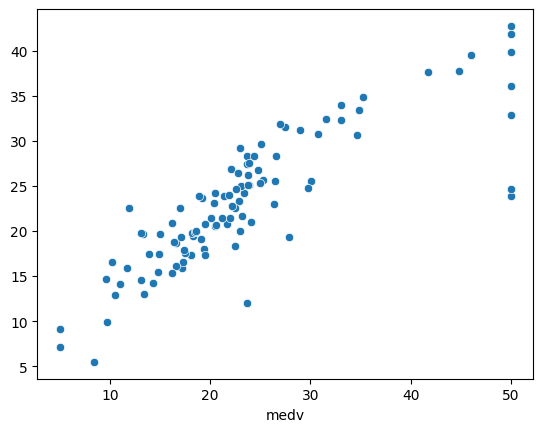

In [22]:
sns.scatterplot(x= Y_test,y= Y_pred)

<Axes: xlabel='medv'>

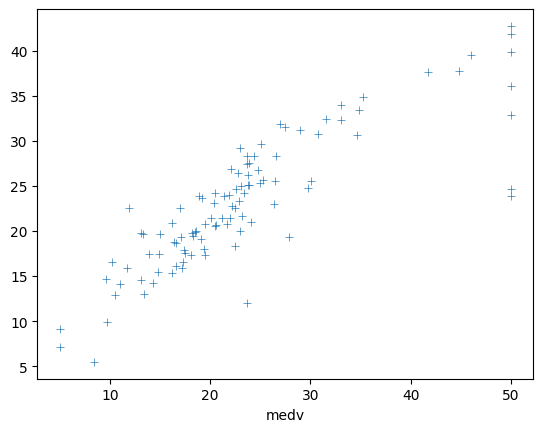

In [23]:
sns.scatterplot(x=Y_test, y=Y_pred, marker="+")

<Axes: xlabel='medv'>

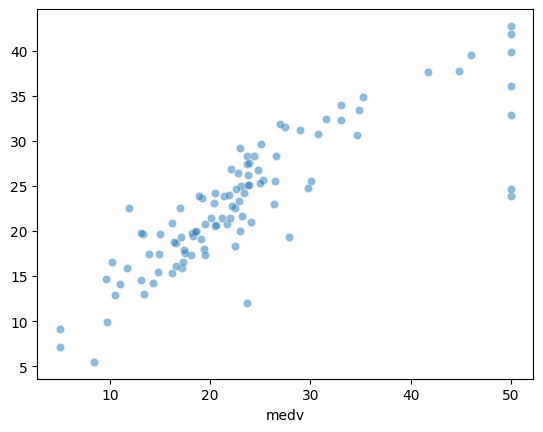

In [24]:
sns.scatterplot(x=Y_test, y=Y_pred, alpha=0.5)